In [1]:
import pandas as pd
import numpy as np

In [2]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv"

In [3]:
df = pd.read_csv(data_url)

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Standardize column names by making them all lowercase and replacing space with underscore
cleaned_columns = df.columns.str.lower().str.replace(" ", "_")
cleaned_columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
df.columns = cleaned_columns
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Check df columns' data types
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
# Get string columns only
str_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
str_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
# Make all string values be lowercase
for str_col in str_cols:
    df[str_col] = df[str_col].str.lower().str.replace(" ", "_")

In [28]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [20]:
# Exploratory data analysts
for col in df.columns:
    print(f"'{col}' column")
    print(df[col].unique()[:5])
    print(f"{df[col].nunique()} unique values")
    print()

'make' column
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48 unique values

'model' column
['1_series_m' '1_series' '100' '124_spider' '190-class']
914 unique values

'year' column
[2011 2012 2013 1992 1993]
28 unique values

'engine_fuel_type' column
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10 unique values

'engine_hp' column
[335. 300. 230. 320. 172.]
356 unique values

'engine_cylinders' column
[ 6.  4.  5.  8. 12.]
9 unique values

'transmission_type' column
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5 unique values

'driven_wheels' column
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4 unique values

'number_of_doors' column
[ 2.  4.  3. nan]
3 unique values

'market_category' column
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71 unique values

'vehicle_size' column
['comp

<Axes: xlabel='msrp', ylabel='Count'>

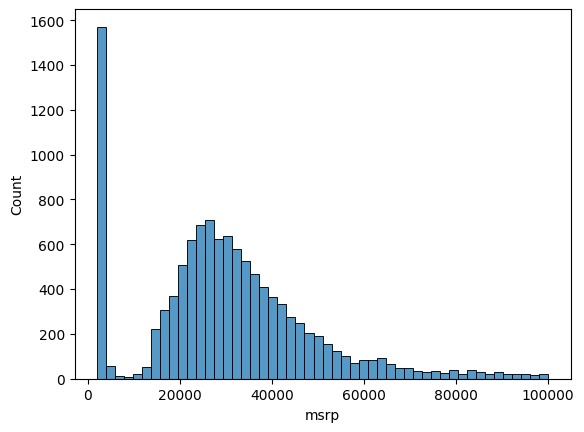

In [8]:
# Distribution of price

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# see cars with price less than 100K
sns.histplot(df['msrp'][df['msrp'] < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

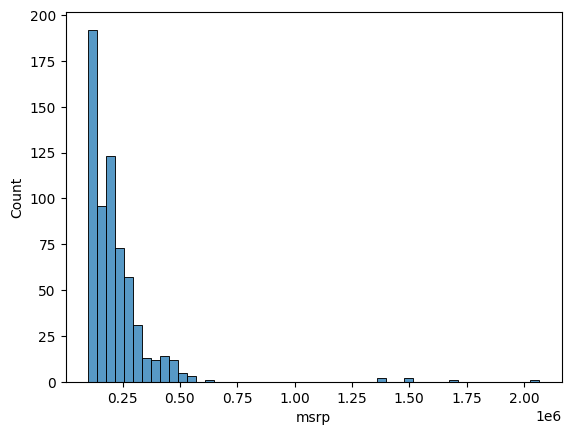

In [34]:
sns.histplot(df['msrp'][df['msrp'] > 100000], bins=50)

In [9]:
# Apply logariphm to reduce distribution (long tail). It kinda converts long-tail distribution to normal distribution
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

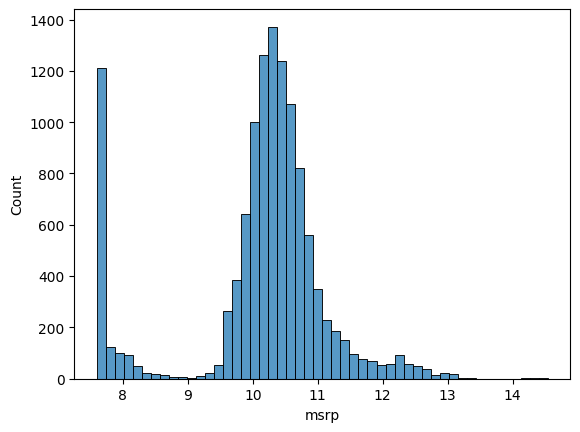

In [12]:
sns.histplot(price_logs, bins=50)

In [42]:
# Check missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
# Setting up the validation framework

In [10]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n)
print(n_train, n_val, n_test)

assert n == n_train + n_val + n_test

11914
7150 2382 2382


In [11]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val: ]

In [ ]:
# Shuffle indexes in the dataframe

In [12]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [13]:
np.random.seed(2)
np.random.shuffle(idx)

In [16]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [17]:
idx[:n_train]

array([2735, 6720, 5878, ..., 9334, 5284, 2420], shape=(7150,))

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]

In [19]:
# Now the records are shuffled
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [20]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [23]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [24]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [72]:
# Linear regression

In [20]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [25]:
def lin_regr(xi):
    n = len(xi)
    w0 = 7.17
    w = [0.01, 0.04, 0.002] # weights yi = w0 + wi1*xi1 + wi2*xi2 + wi3*xi3
    return w0 + sum([w[i] * xi[i] for i in range(n)])

lin_regr([453, 11, 86]) # features

12.312000000000001

In [26]:
# Convert price back as before we transformed price using np.log1p
np.exp(12.312) - 1

np.float64(222347.2221101062)

#### Linear regression vector form

In [27]:
def dot(xi, w):
    n = len(xi)
    return sum([xi[i]*w[i] for i in range(n)])

dot([1, 2, 3], [2, 3, 4])

20

In [28]:
w0 = [7.17]
w = [0.01, 0.04, 0.002]
w_new = w0 + w

def lin_regr2(xi):
    xi = [1] + xi
    return dot(xi, w_new)

lin_regr2([453, 11, 86])

12.312

In [29]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
print(X)
X = np.array(X)
print(X)

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]
[[   1  148   24 1385]
 [   1  132   25 2031]
 [   1  453   11   86]]


In [30]:
def linear_regression(X):
    return X.dot(w_new)

linear_regression(X)

array([12.38 , 13.552, 12.312])

In [39]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [32]:
XTX = X.T.dot(X)
XTX

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [33]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [40]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [35]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 26.08419498, 286.12285934,   3.93813107])

In [36]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [37]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [41]:
w_full = train_linear_regression(X, y)
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(25844.754055766753),
 (array([ -16.08906468, -199.47254894,   -1.22802883]),))

#### Car price baseline model

In [39]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [42]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [43]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [44]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [45]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

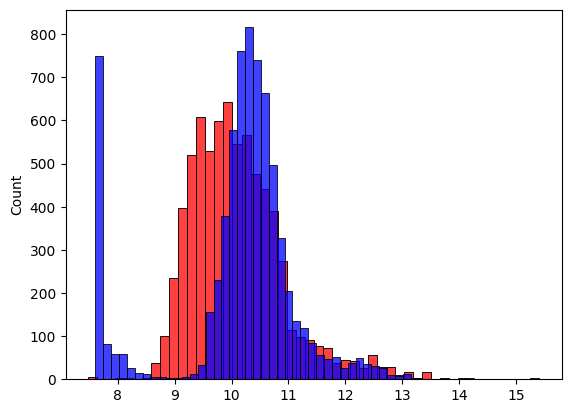

In [46]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', bins=50)

#### RMSE

In [47]:
def rmse(y_pred, y_fact):
    assert len(y_pred) == len(y_fact)
    s_err = (y_pred - y_fact) ** 2
    mse = s_err.mean()
    return np.sqrt(mse)

rmse(y_pred, y_train)

np.float64(0.7554192603920132)

#### Validating the model

np.float64(0.751003347391545)

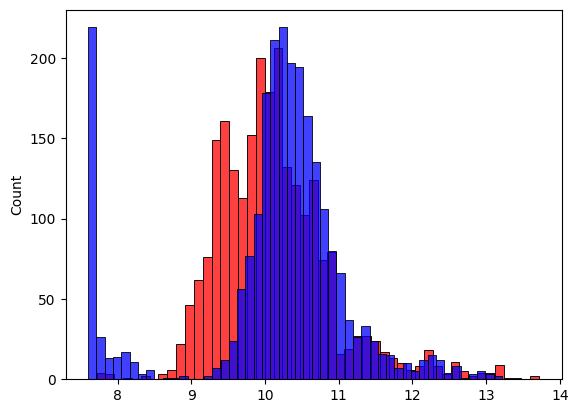

In [48]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_val = df_val[base].fillna(0).values
w0_val, w_val = train_linear_regression(X_val, y_val)
y_pred_val = w0_val + X_val.dot(w_val)
sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)
rmse(y_pred_val, y_val)

In [49]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_pred_val, y_val)

np.float64(0.761653099130156)

<Axes: ylabel='Count'>

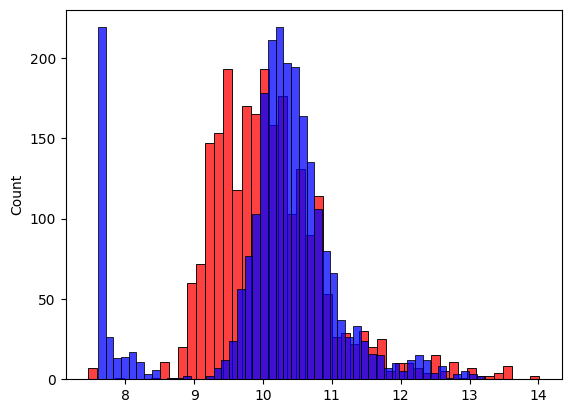

In [41]:
sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

#### Simple feature engineering

In [50]:
# Instead of using just car year, we derive car age
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [51]:
def prepare_X(df):
    df = df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


0.5172055461058299


<Axes: ylabel='Count'>

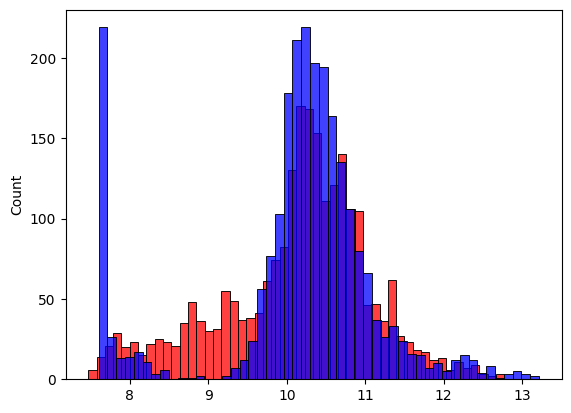

In [52]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

print(rmse(y_pred_val, y_val))

sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [67]:
def prepare_X(df):
    df = df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    
    for num_doors in (2, 3, 4):
        df[f"num_doors_{num_doors}"] = (df.number_of_doors == num_doors).astype('int')
        features.append(f"num_doors_{num_doors}")
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

0.515799564150169


<Axes: ylabel='Count'>

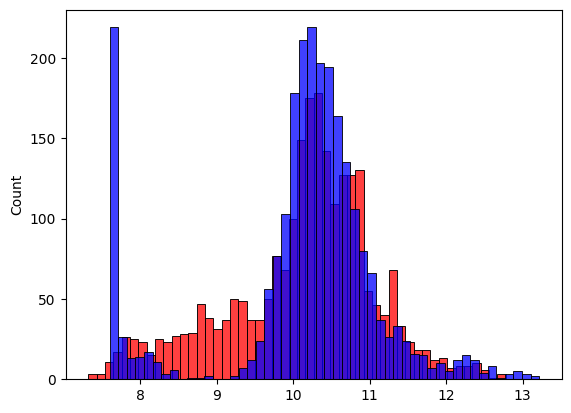

In [68]:
# add number of doors feature to the model and check rmse again to see if it improved

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

print(rmse(y_pred_val, y_val))

sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [92]:
# researching the `make` attribute

# pick up top 5 most popular makes
df.make.value_counts().head().index.tolist()

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [102]:
# update prepare_X function

def prepare_X(df):
    df = df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    
    for num_doors in (2, 3, 4):
        df[f"num_doors_{num_doors}"] = (df.number_of_doors == num_doors).astype('int')
        features.append(f"num_doors_{num_doors}")

    for make in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        df[f"make_{make}"] = (df.make == make).astype('int')
        features.append(f"make_{make}")
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

0.5076038849556795


<Axes: ylabel='Count'>

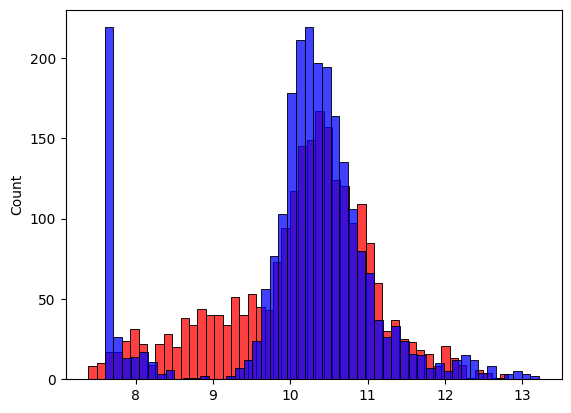

In [103]:
# add make feature to the model and check rmse again to see if it improved

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

print(rmse(y_pred_val, y_val))

sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [108]:
# all categorical fields

categories = df.dtypes.index[df.dtypes == 'object'].tolist()
categories

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [111]:
for cat in categories:
    print(f"=== {cat} ===")
    print(df[cat].value_counts().head().index.tolist())

=== make ===
['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']
=== model ===
['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'beetle_convertible']
=== engine_fuel_type ===
['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']
=== transmission_type ===
['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']
=== driven_wheels ===
['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']
=== market_category ===
['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']
=== vehicle_size ===
['compact', 'midsize', 'large']
=== vehicle_style ===
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']


In [114]:
features_dict = {cat : df[cat].value_counts().head().index.tolist() for cat in categories}
features_dict

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [121]:
df_444 = df_train.copy()

In [125]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [126]:
df_444.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,make__chevrolet,make__ford,make__volkswagen,make__toyota,make__dodge,model__silverado_1500,model__tundra,model__f-150,model__sierra_1500,model__beetle_convertible,engine_fuel_type__regular_unleaded,engine_fuel_type__premium_unleaded_(required),engine_fuel_type__premium_unleaded_(recommended),engine_fuel_type__flex-fuel_(unleaded/e85),engine_fuel_type__diesel,transmission_type__automatic,transmission_type__manual,transmission_type__automated_manual,transmission_type__direct_drive,transmission_type__unknown,driven_wheels__front_wheel_drive,driven_wheels__rear_wheel_drive,driven_wheels__all_wheel_drive,driven_wheels__four_wheel_drive,market_category__crossover,market_category__flex_fuel,market_category__luxury,"market_category__luxury,performance",market_category__hatchback,vehicle_size__compact,vehicle_size__midsize,vehicle_size__large,vehicle_style__sedan,vehicle_style__4dr_suv,vehicle_style__coupe,vehicle_style__convertible,vehicle_style__4dr_hatchback
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [123]:
features_dict = {cat : df[cat].value_counts().head().index.tolist() for cat in categories}
for cat, cat_items in features_dict.items():
    print(cat)
    print(items)
    for cat_item in cat_items:
        df_444[f"{cat}__{cat_item}"] = (df_444[cat] == cat_item).astype('int')
        #features.append(f"{cat}__{cat_item}")


make
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
model
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
engine_fuel_type
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
transmission_type
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
driven_wheels
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
market_category
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
vehicle_size
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
vehicle_style
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']


In [132]:
# Update prepare_X function again to include all categorical values
categories = df.dtypes.index[df.dtypes == 'object'].tolist()
cat_features_dict = {cat : df[cat].value_counts().head().index.tolist() for cat in categories}

def prepare_X(df):
    df = df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df['age'] = df.year.max() - df.year
    features = base + ['age']

    for num_doors in (2, 3, 4):
        df[f"num_doors_{num_doors}"] = (df.number_of_doors == num_doors).astype('int')
        features.append(f"num_doors_{num_doors}")

    for cat, cat_items in cat_features_dict.items():
        for cat_item in cat_items:
            df[f"{cat}__{cat_item}"] = (df[cat] == cat_item).astype('int')
            features.append(f"{cat}__{cat_item}")
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

44.515289229901704


<Axes: ylabel='Count'>

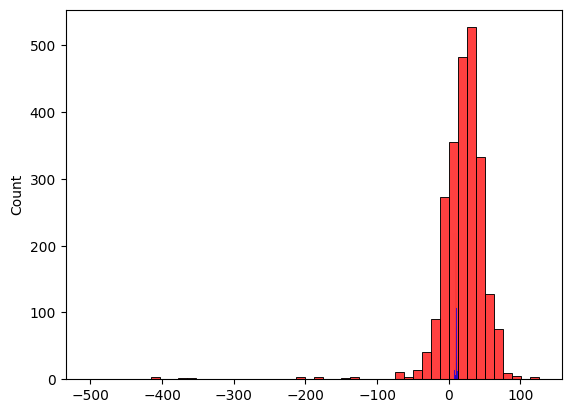

In [133]:
# add all categorical features the model and check rmse again to see if it improved

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

print(rmse(y_pred_val, y_val))

sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [140]:
# Regularization

XX = [
    [1, 2, 2],
    [8, 4, 4],
    [9, 6, 6]
]
XX = np.array(XX)
XX

array([[1, 2, 2],
       [8, 4, 4],
       [9, 6, 6]])

In [145]:
corr_matr = np.eye(3) * 0.000001
corr_matr

array([[1.e-06, 0.e+00, 0.e+00],
       [0.e+00, 1.e-06, 0.e+00],
       [0.e+00, 0.e+00, 1.e-06]])

In [146]:
XX + corr_matr

array([[1.000001, 2.      , 2.      ],
       [8.      , 4.000001, 4.      ],
       [9.      , 6.      , 6.000001]])

In [147]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0]) * r
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


0.451452768257852


<Axes: ylabel='Count'>

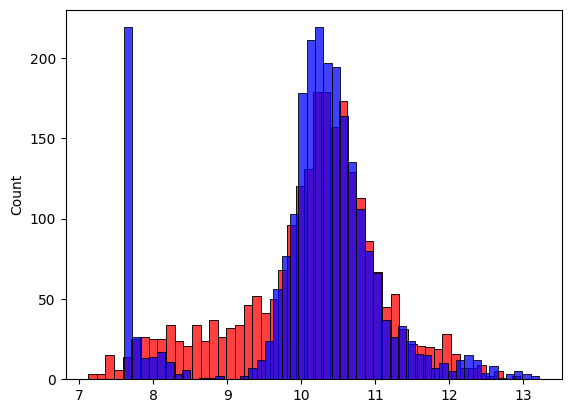

In [156]:
# add all categorical features the model and check rmse again to see if it improved

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

print(rmse(y_pred_val, y_val))

sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [155]:
# Tuning the model

for r in [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 100, 0.0]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val)
    y_pred_val = w0 + X_val.dot(w)
    score = rmse(y_pred_val, y_val)
    print(r, w0, score)

10 4.288463855225997 0.4652194932218006
1 5.637951752518074 0.4521599847172572
0.1 6.193822646073503 0.4515059259243021
0.01 6.279146518518864 0.4514573943727878
0.001 6.288517820475009 0.451452768257852
0.0001 6.249958071121619 0.45145230614057247
1e-05 10.853353555550502 0.45145224953828655
100 2.499864610410077 0.5767629751737211
0.0 7440836262456788.0 44.515289229901704


0.451452768257852


<Axes: ylabel='Count'>

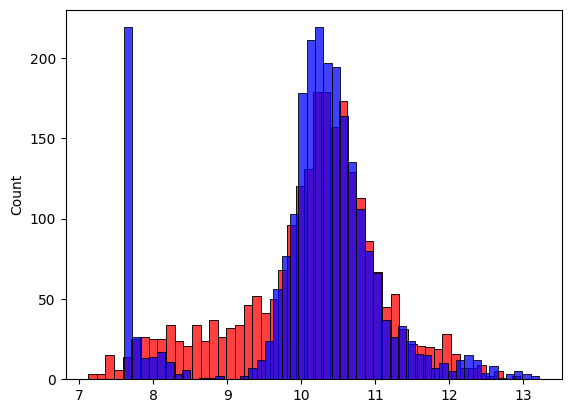

In [157]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

print(rmse(y_pred_val, y_val))

sns.histplot(y_pred_val, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [160]:
# Using the model

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

0.44743043918778697


<Axes: ylabel='Count'>

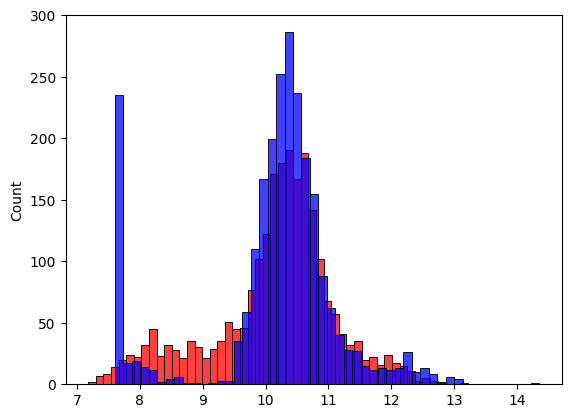

In [172]:
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val]) #np.hstack((y_train, y_val))

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred_test = w0 + X_test.dot(w)

print(rmse(y_pred_test, y_test))

sns.histplot(y_pred_test, color='red', bins=50)
sns.histplot(y_test, color='blue', bins=50)

In [182]:
car = df_test.iloc[1].to_dict()
car

{'make': 'mercedes-benz',
 'model': '600-class',
 'year': 1993,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 389.0,
 'engine_cylinders': 12.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'luxury',
 'vehicle_size': 'large',
 'vehicle_style': 'coupe',
 'highway_mpg': 15,
 'city_mpg': 11,
 'popularity': 617}

In [183]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617


In [184]:
X_small = prepare_X(df_small)
X_small

array([[389.,  12.,  15.,  11., 617.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.]])

In [186]:
y_pred_small = w0 + X_small.dot(w)
y_pred_small = y_pred_small[0]
y_pred_small

np.float64(11.741772680970364)

In [187]:
np.expm1(y_pred_small)

np.float64(125713.99519382104)

In [190]:
y_test[1]

np.float64(8.074649075066652)